# Importing dataset

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil

# Define paths to your training and validation directories
train_dir = '/content/drive/MyDrive/FruitDataSet/train'
validation_dir = '/content/drive/MyDrive/FruitDataSet/validation'

# Get the list of classes present in the training data
training_classes = os.listdir(train_dir)

# Get the list of classes present in the validation data
validation_classes = os.listdir(validation_dir)

# Remove classes from the validation data that are not present in the training data
classes_to_remove = set(validation_classes) - set(training_classes)

for cls in classes_to_remove:
    shutil.rmtree(os.path.join(validation_dir, cls))

# Training Image preprocessing


In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitDataSet/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


# Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitDataSet/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Building Model


In [ ]:
cnn = tf.keras.models.Sequential()


# Building Convolution Layer


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:
cnn.add(tf.keras.layers.Flatten())


In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))


In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))


In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting


In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [42]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=5)


Epoch 1/5
98/98 [==============================] - 159s 2s/step - loss: 0.2949 - accuracy: 0.9165 - val_loss: 0.4894 - val_accuracy: 0.9630
Epoch 2/5
98/98 [==============================] - 150s 1s/step - loss: 0.2961 - accuracy: 0.9226 - val_loss: 0.4653 - val_accuracy: 0.9601
Epoch 3/5
98/98 [==============================] - 148s 1s/step - loss: 0.2792 - accuracy: 0.9291 - val_loss: 0.7538 - val_accuracy: 0.9573
Epoch 4/5
98/98 [==============================] - 151s 1s/step - loss: 0.3174 - accuracy: 0.9210 - val_loss: 0.6651 - val_accuracy: 0.9345
Epoch 5/5
98/98 [==============================] - 177s 2s/step - loss: 0.2984 - accuracy: 0.9204 - val_loss: 0.5800 - val_accuracy: 0.9573


# Evaluating Model

In [43]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 95s 917ms/step - loss: 0.1138 - accuracy: 0.9727
Training accuracy: 0.9727126955986023


In [44]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 13s 371ms/step - loss: 0.5800 - accuracy: 0.9573
Validation accuracy: 0.9572649598121643


# Saving Model

In [45]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
training_history.history #Return Dictionary of history


{'loss': [0.29488351941108704,
  0.2960951030254364,
  0.2791813611984253,
  0.31736698746681213,
  0.29837942123413086],
 'accuracy': [0.9165329337120056,
  0.9226323962211609,
  0.9290529489517212,
  0.9210273027420044,
  0.9203852415084839],
 'val_loss': [0.4894142746925354,
  0.465323805809021,
  0.7537762522697449,
  0.6651129126548767,
  0.5799615979194641],
 'val_accuracy': [0.9629629850387573,
  0.9601139426231384,
  0.9572649598121643,
  0.934472918510437,
  0.9572649598121643]}

In [47]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [48]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Accuracy of Model Achieved on Validation set


In [49]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 95.72649598121643 %


# Accuracy Visualization


## Training Visualization



In [52]:
training_history.history['accuracy']


[0.9165329337120056,
 0.9226323962211609,
 0.9290529489517212,
 0.9210273027420044,
 0.9203852415084839]

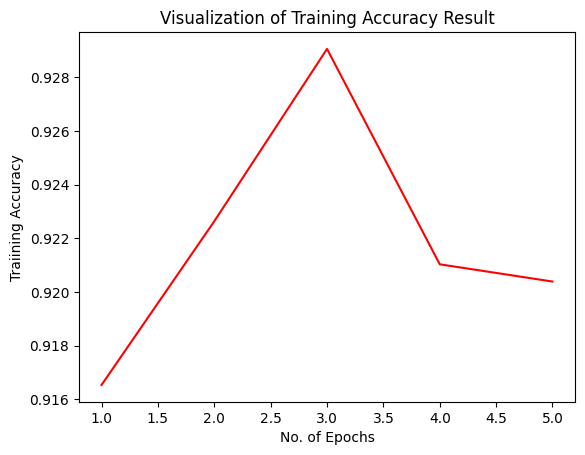

In [54]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

## Validation Accuracy


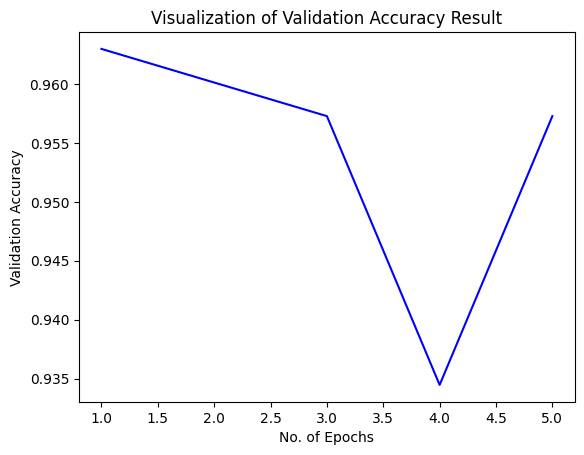

In [55]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

## Test set Evaluation


In [57]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitDataSet/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 363 files belonging to 36 classes.


In [58]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 66s 1s/step - loss: 0.5617 - accuracy: 0.9587
Test accuracy: 0.9586777091026306
